In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.cm import ScalarMappable
from matplotlib.colors import TwoSlopeNorm
from scipy import stats

idx = [4  ,6  ,8  ,9  ,10 ,11 ,5  ,16 ,17 ,18 ,20 ,21 ,24 ,25 ,27 ,30 ,37 ,38 ,41 ,45 ]

## SE Plot

<ipython-input-3-2ae8a9772ad7>:24: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


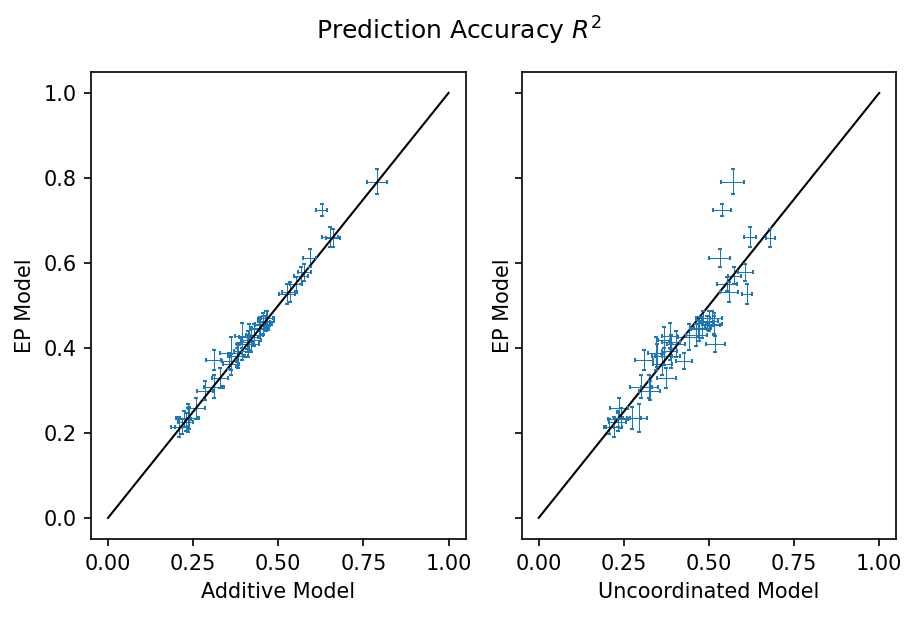

In [3]:
df = pd.read_csv('./NIHMS429465-supplement-3.csv')
diff = df['broad-sense (H^2)'] - df['narrow-sense (h^2) (using average of replicates)']
res = pd.read_csv('./bloom13/prediction.csv')
res_mean = res.groupby('pheno').mean()
res_std = res.groupby('pheno').std()/np.sqrt(10)

x1 = 'adr'
x2 = 'adr_raw'
y = 'epr'

fig, axes = plt.subplots(1, 2, constrained_layout=True, sharey=True)
fig.dpi=150
comp = zip([res_mean[x1], res_mean[x2]], [res_std[x1], res_std[x2]], ["Additive Model", "Uncoordinated Model"])

for (s_plot, ax), (x, x_std, x_lab) in zip(enumerate(axes.flat), comp):
    #sc = ax.scatter(x, ce_acc, marker='o', s = 30, edgecolors='black', linewidth=.2, c=diff, cmap=cmap)
    ax.plot([0, 1], [0, 1], color = 'black', linewidth = 1)
    ax.errorbar(x, res_mean[y], xerr=x_std, yerr=res_std[y], linewidth=0, elinewidth=0.5, capsize=0.8)
    ax.set_xlabel(x_lab)
    ax.set_ylabel('EP Model')

fig.suptitle(r'Prediction Accuracy $R^2$')
# fig.savefig('../yeast/plots/pred-error-no-self.png')
fig.show()

<ipython-input-10-5cbbd2806ac2>:60: UserWarning: This figure was using constrained_layout==True, but that is incompatible with subplots_adjust and or tight_layout: setting constrained_layout==False. 
  plt.tight_layout()
<ipython-input-10-5cbbd2806ac2>:63: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


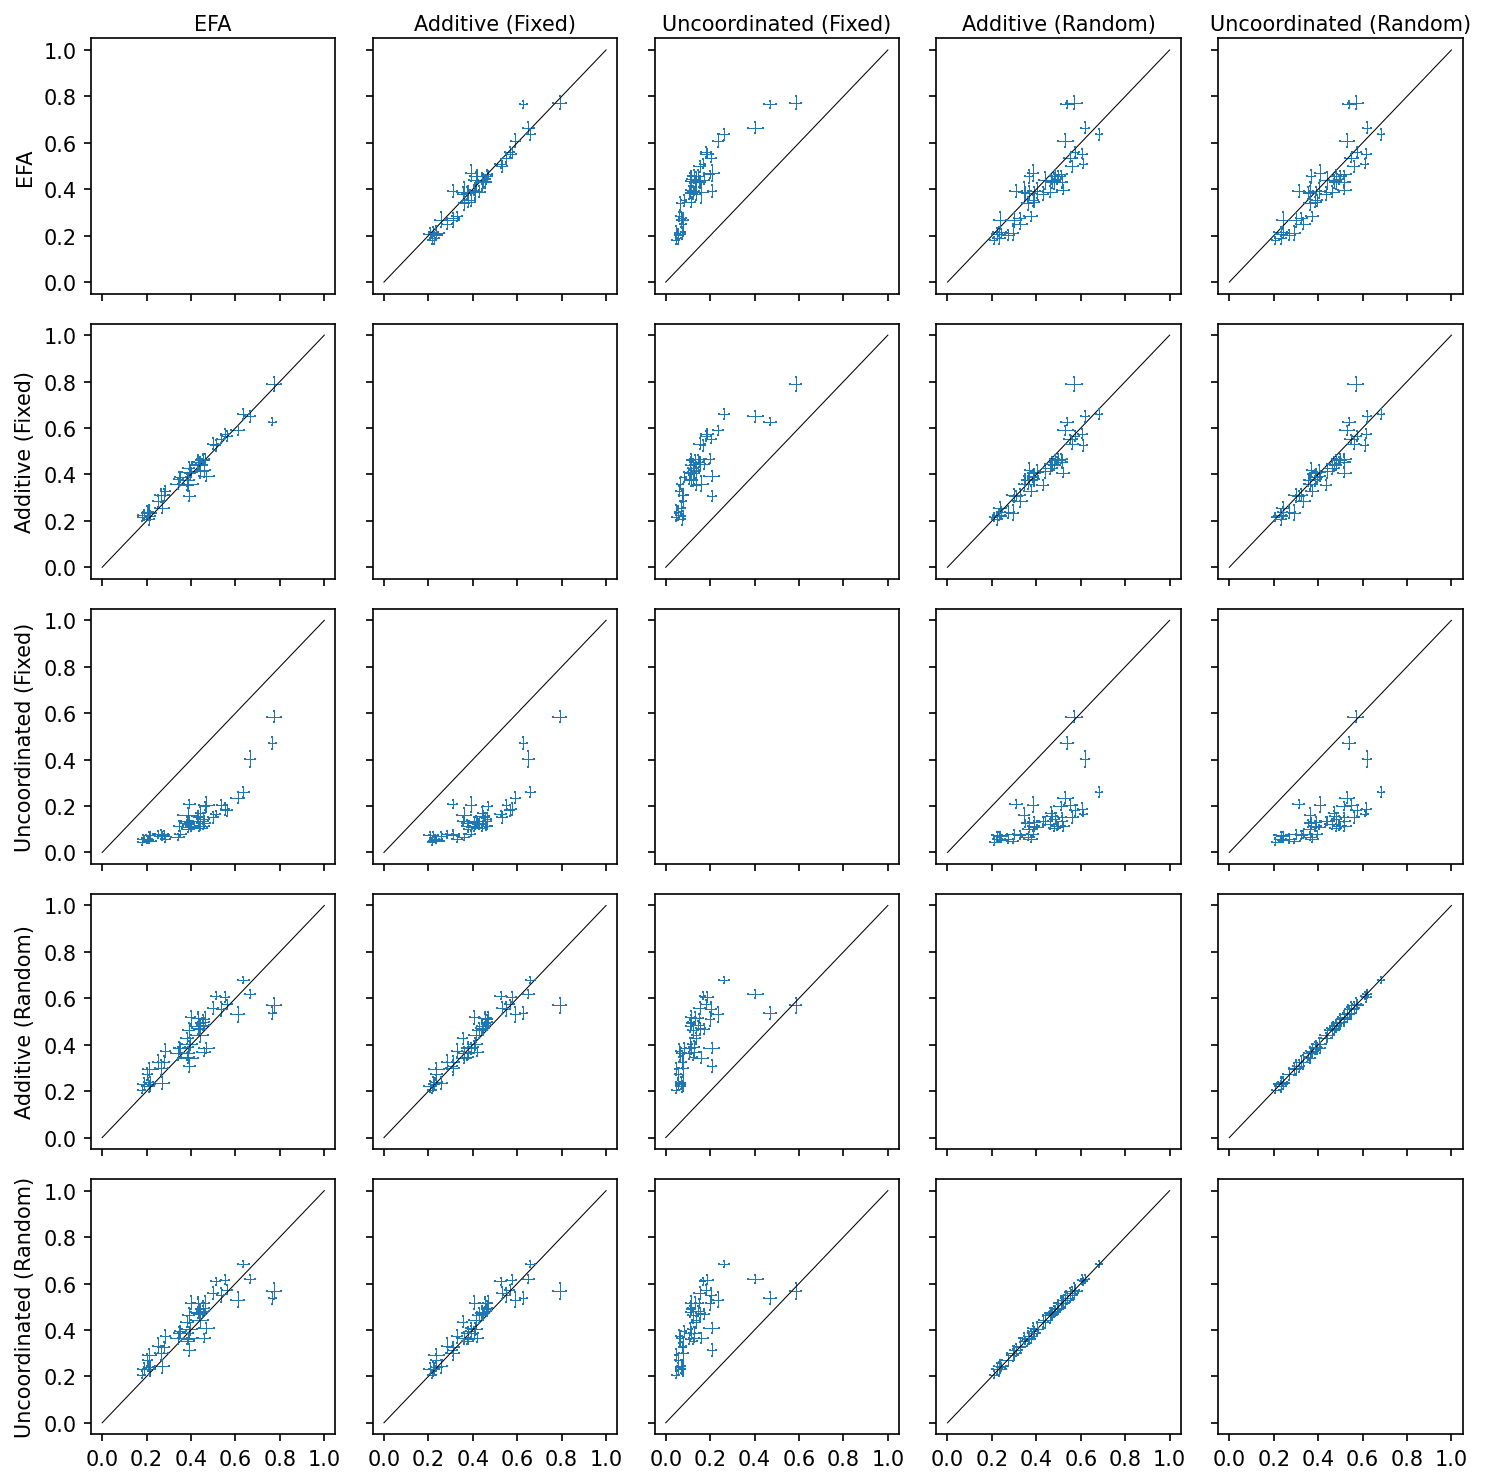

In [10]:
df = pd.read_csv('./NIHMS429465-supplement-3.csv')
diff = df['broad-sense (H^2)'] - df['narrow-sense (h^2) (using average of replicates)']
res = pd.read_csv('./bloom13/prediction.csv')
res_mean = res.groupby('pheno').mean()
res_std = res.groupby('pheno').std()/np.sqrt(10)

x1 = 'adr'
x2 = 'adr_raw'

y = 'epr'

fig, axes = plt.subplots(5, 5, constrained_layout=True, sharey=True, sharex = True, figsize=(10, 10))
fig.dpi=150
comp = zip([
        res_mean['ide'],
        res_mean['adf'],
        res_mean['epf'],
        res_mean['adr_raw'],
        res_mean['epr_raw']], 
    [
        res_std['ide'],
        res_std['adf'],
        res_std['epf'],
        res_std['adr_raw'],
        res_std['epr_raw']], 
    [
        'EFA',
        'Additive (Fixed)',
        'Uncoordinated (Fixed)',
        'Additive (Random)',
        'Uncoordinated (Random)'])

for i, (y, y_std, y_lab) in zip(range(5), comp):
    #sc = ax.scatter(x, ce_acc, marker='o', s = 30, edgecolors='black', linewidth=.2, c=diff, cmap=cmap)
    axes[i, 0].set_ylabel(y_lab)

    if i != 0:
        axes[i, 0].plot([0, 1], [0, 1], color = 'black', linewidth = 0.5)
        axes[i, 0].errorbar(res_mean['ide'], y, xerr=res_std['ide'], yerr=y_std, linewidth=0, elinewidth=0.5, capsize=0.5)
        
    if i != 1:
        axes[i, 1].plot([0, 1], [0, 1], color = 'black', linewidth = 0.5)
        axes[i, 1].errorbar(res_mean['adf'], y, xerr=res_std['adf'], yerr=y_std, linewidth=0, elinewidth=0.5, capsize=0.5)

    if i != 2:
        axes[i, 2].plot([0, 1], [0, 1], color = 'black', linewidth = 0.5)
        axes[i, 2].errorbar(res_mean['epf'], y, xerr=res_std['epf'], yerr=y_std, linewidth=0, elinewidth=0.5, capsize=0.5)
    
    if i != 3:
        axes[i, 3].plot([0, 1], [0, 1], color = 'black', linewidth = 0.5)
        axes[i, 3].errorbar(res_mean['adr_raw'], y, xerr=res_std['adr_raw'], yerr=y_std, linewidth=0, elinewidth=0.5, capsize=0.5)

    if i != 4:
        axes[i, 4].plot([0, 1], [0, 1], color = 'black', linewidth = 0.5)
        axes[i, 4].errorbar(res_mean['epr_raw'], y, xerr=res_std['epr_raw'], yerr=y_std, linewidth=0, elinewidth=0.5, capsize=0.5)

    axes[0, i].set_xlabel(y_lab)
    axes[0, i].xaxis.set_label_position('top')

plt.tight_layout()
plt.xticks(np.arange(0, 1.1, 0.2))
# fig.savefig('../yeast/plots/bloom15_pairwise_comps.png')
fig.show()

In [11]:
res_mean['ide'].mean()

0.40793390511545885

In [12]:
res_mean['adf'].mean()

0.41340695761600577

## t-test

In [187]:
df = pd.read_csv('./NIHMS429465-supplement-3.csv')
diff = df['broad-sense (H^2)'] - df['narrow-sense (h^2) (using average of replicates)']
res = pd.read_csv('./bloom15/prediction.csv')

res['diff'] = res['ide'] - res['adf']

stat_test = res.groupby('pheno').apply(lambda df: stats.ttest_1samp(df['diff'], 0, alternative='greater')[1])
# stat_test = res.groupby('pheno').apply(lambda df: stats.ttest_ind(df['ide'], df['epr_raw'], alternative='greater')[1])
print((stat_test < 0.05/20).sum())
[idx[int(i)-1]+1 for i in stat_test[stat_test < 0.05].index]


5


[5, 7, 10, 17, 22, 26, 42]

In [186]:
[i + 1 for i  in idx ]

[5, 7, 9, 10, 11, 12, 6, 17, 18, 19, 21, 22, 25, 26, 28, 31, 38, 39, 42, 46]

In [1]:
from scipy import stats

df = pd.read_csv('./NIHMS429465-supplement-3.csv')
diff = df['broad-sense (H^2)'] - df['narrow-sense (h^2) (using average of replicates)']
res = pd.read_csv('./bloom13/prediction.csv')

res['diff'] = res['epr_raw'] - res['adf']
# res['diff'] = res['ide'] - res['adf']

stat_test = res.groupby('pheno').apply(lambda df: stats.ttest_1samp(df['diff'], 0, alternative='greater')[1])
# stat_test = res.groupby('pheno').apply(lambda df: stats.ttest_ind(df['ide'], df['epr_raw'], alternative='greater')[1])

# plt.hist(stat_test, bins=30)

print((stat_test < 0.05).sum())
[int(i) for i in stat_test[stat_test < 0.05].index]


NameError: name 'pd' is not defined

In [ ]:
[7, 8, 10, 13, 22, 31, 32, 35, 43]
[1, 17, 22, 23, 33, 34, 44]

In [117]:
df = pd.read_csv('./NIHMS429465-supplement-3.csv')
idx = [4  ,6  ,8  ,9  ,10 ,11 ,5  ,16 ,17 ,18 ,20 ,21 ,24 ,25 ,27 ,30 ,37 ,38 ,41 ,45 ]
df = df.iloc[idx,:].reset_index(drop=True).reset_index()


# df = df.reset_index()
df['index'] += 1
res = pd.read_csv('./bloom15/prediction.csv')
res = res.loc[:,['pheno', 'ide', 'ce2', 'ce3', 'ce4', 'adf', 'epf', 'adr_raw', 'epr_raw', 'fold']]
res.columns = ['pheno', 'EFA Identified', 'EFA (K = 2)', 'EFA (K = 3)', 'EFA (K = 4)', 
    'Additive Fixed Effects', 'Uncoordinated Fixed Effects', 
    'Additive Random Effects', 'Uncoordinated Random Effects', 'Fold']
res.pheno = res.pheno.astype(int)
res.Fold = res.Fold.astype(int)
df = df.merge(res, left_on='index', right_on='pheno')
df.pop('pheno')
df.pop('index')
df.to_csv('../paper/bloom15_supp.csv', index=False)



In [116]:
df.Trait.unique()

array(['Cobalt_Chloride', 'Copper', 'Diamide', 'E6_Berbamine', 'Ethanol',
       'Formamide', 'Congo_red', 'Indoleacetic_Acid', 'Lactate',
       'Lactose', 'Magnesium_Chloride', 'Manganese_Sulfate', 'Menadione',
       'Neomycin', 'Raffinose', 'Trehalose', 'Xylose', 'YNB', 'YPD',
       'Zeocin'], dtype=object)

In [302]:
diff = res.groupby('pheno').mean()['diff']

## Color Plot

In [1]:
df = pd.read_csv('./NIHMS429465-supplement-3.csv')
res = pd.read_csv('./bloom13/prediction.csv')
res_mean = res.groupby('pheno').mean()

idx = [4  ,6  ,8  ,9  ,10 ,11 ,5  ,16 ,17 ,18 ,20 ,21 ,24 ,25 ,27 ,30 ,37 ,38 ,41 ,45 ]
# df = df.iloc[idx,:]


H2 = df['broad-sense (H^2)']
h2 = df['narrow-sense (h^2) (using average of replicates)']

res['diff'] = res['ide'] - res['adf']
stat_test = res.groupby('pheno').apply(lambda df: stats.ttest_1samp(df['diff'], 0, alternative='greater')[1])
diff = stat_test

cmap = plt.get_cmap("Reds_r")
cmap_lim = max(np.abs(diff.min()), np.abs(diff.max()))
norm = plt.Normalize(vmin=0, vmax=1)

fig, ax = plt.subplots()
fig.dpi = 150
fig.suptitle('Trait Heritability')
ax.scatter(y=h2, x=H2, marker='o', s = 30, c=diff, edgecolors='black', linewidth=.2, cmap = 'Reds_r', vmin=0, vmax = 1)
ax.plot([0, 1], [0, 1], color = 'black', linewidth = 1)

sm =  ScalarMappable(norm=norm, cmap=cmap)
sm.set_array([])
cbar = fig.colorbar(sm, ax=fig.add_axes())
cbar.ax.set_title(r'p-val')


plt.ylabel('narrow sense heritability')
plt.xlabel('broad sense heritability')
# plt.savefig('../yeast/plots/pred-acc-no-self-2.png')
plt.show()

NameError: name 'pd' is not defined

In [303]:
from scipy.stats import pearsonr, spearmanr


spearmanr(diff, H2-h2)

SpearmanrResult(correlation=0.4806885936949983, pvalue=0.0007215087301617581)

In [181]:
# from tkinter import font


# df = pd.read_csv('./NIHMS429465-supplement-3.csv')
# res = pd.read_csv('./bloom13/prediction.csv')
# res_mean = res.groupby('pheno').mean()

# idx = [4  ,6  ,8  ,9  ,10 ,11 ,5  ,16 ,17 ,18 ,20 ,21 ,24 ,25 ,27 ,30 ,37 ,38 ,41 ,45 ]
# # res_mean = res_mean.iloc[idx,:]
# # df = df.iloc[idx,:]


# H2 = df['broad-sense (H^2)']
# h2 = df['narrow-sense (h^2) (using average of replicates)']



# # stat_test = res.groupby('pheno').apply(lambda df: stats.ttest_1samp(df['diff'], 0, alternative='greater')[1])
# # diff = stat_test
# # diff = np.array(res_mean['ide']) - np.array(res_mean['adf'])

# cmap = plt.get_cmap("bwr")
# cmap_lim = 0.2
# norm = TwoSlopeNorm(vmin=-cmap_lim, vmax=cmap_lim, vcenter=0)
# # norm = TwoSlopeNorm(vmin=0, vmax=1, vcenter=0.5)

# fig, ax = plt.subplots(1, 2, figsize=(8, 4))
# fig.dpi = 600
# # fig.suptitle('Trait Heritability')
# ax[0].scatter(y=h2, x=H2, marker='o', s = 30, c=np.array(res_mean['ide']) - np.array(res_mean['adf']), 
#     edgecolors='black', linewidth=.2, cmap = 'bwr', vmin=-cmap_lim, vmax = cmap_lim)
# ax[1].scatter(y=h2, x=H2, marker='o', s = 30, c=np.array(res_mean['ide']) - np.array(res_mean['epf']), 
#     edgecolors='black', linewidth=.2, cmap = 'bwr', vmin=-cmap_lim, vmax = cmap_lim)
# ax[0].plot([0, 1], [0, 1], color = 'black', linewidth = 0.5)
# ax[1].plot([0, 1], [0, 1], color = 'black', linewidth = 0.5)

# sm =  ScalarMappable(norm=norm, cmap=cmap)
# sm.set_array([])
# # cbaxes = fig.add_axes([0.8, 0.15, 0.02, 0.6]) 
# # cbaxes = fig.add_axes([0.92, 0.15, 0.02, 0.6]) 
# add_cbaxes = fig.add_axes([0.125, 0.82, 0.3525, 0.03]) 
# add_cbaxes.set_title(r'$R^{2}_{EFA} - R^{2}_{additive}$')
# add_cbaxes.tick_params(labelsize=10)
# add_cbar = fig.colorbar(sm, cax=add_cbaxes, orientation='horizontal',
#     ticklocation='top', ticks=np.arange(-0.2, 0.2+1, 0.1))


# epf_cbaxes = fig.add_axes([0.5475, 0.82, 0.3525, 0.03]) 
# epf_cbaxes.set_title(r'$R^{2}_{EFA} - R^{2}_{uncoordinated}$')
# epf_cbaxes.tick_params(labelsize=10)
# epf_cbar = fig.colorbar(sm, cax=epf_cbaxes, orientation='horizontal', 
#     ticklocation='top', ticks=np.arange(-0.2, 0.2+1, 0.1))
# # cbar.set_label(r'$R^{2}_{efa} - R^{2}_{add}$', rotation=270)


# ax[0].set_ylabel('Narrow Sense Heritability', fontsize = 12)
# fig.text(0.5, 0.1, 'Broad Sense Heritability', ha='center', fontdict = {'fontsize' : 12})
# plt.subplots_adjust(top = 0.8, bottom = 0.2)
# plt.savefig('../yeast/plots/fig4.png')
# plt.show()

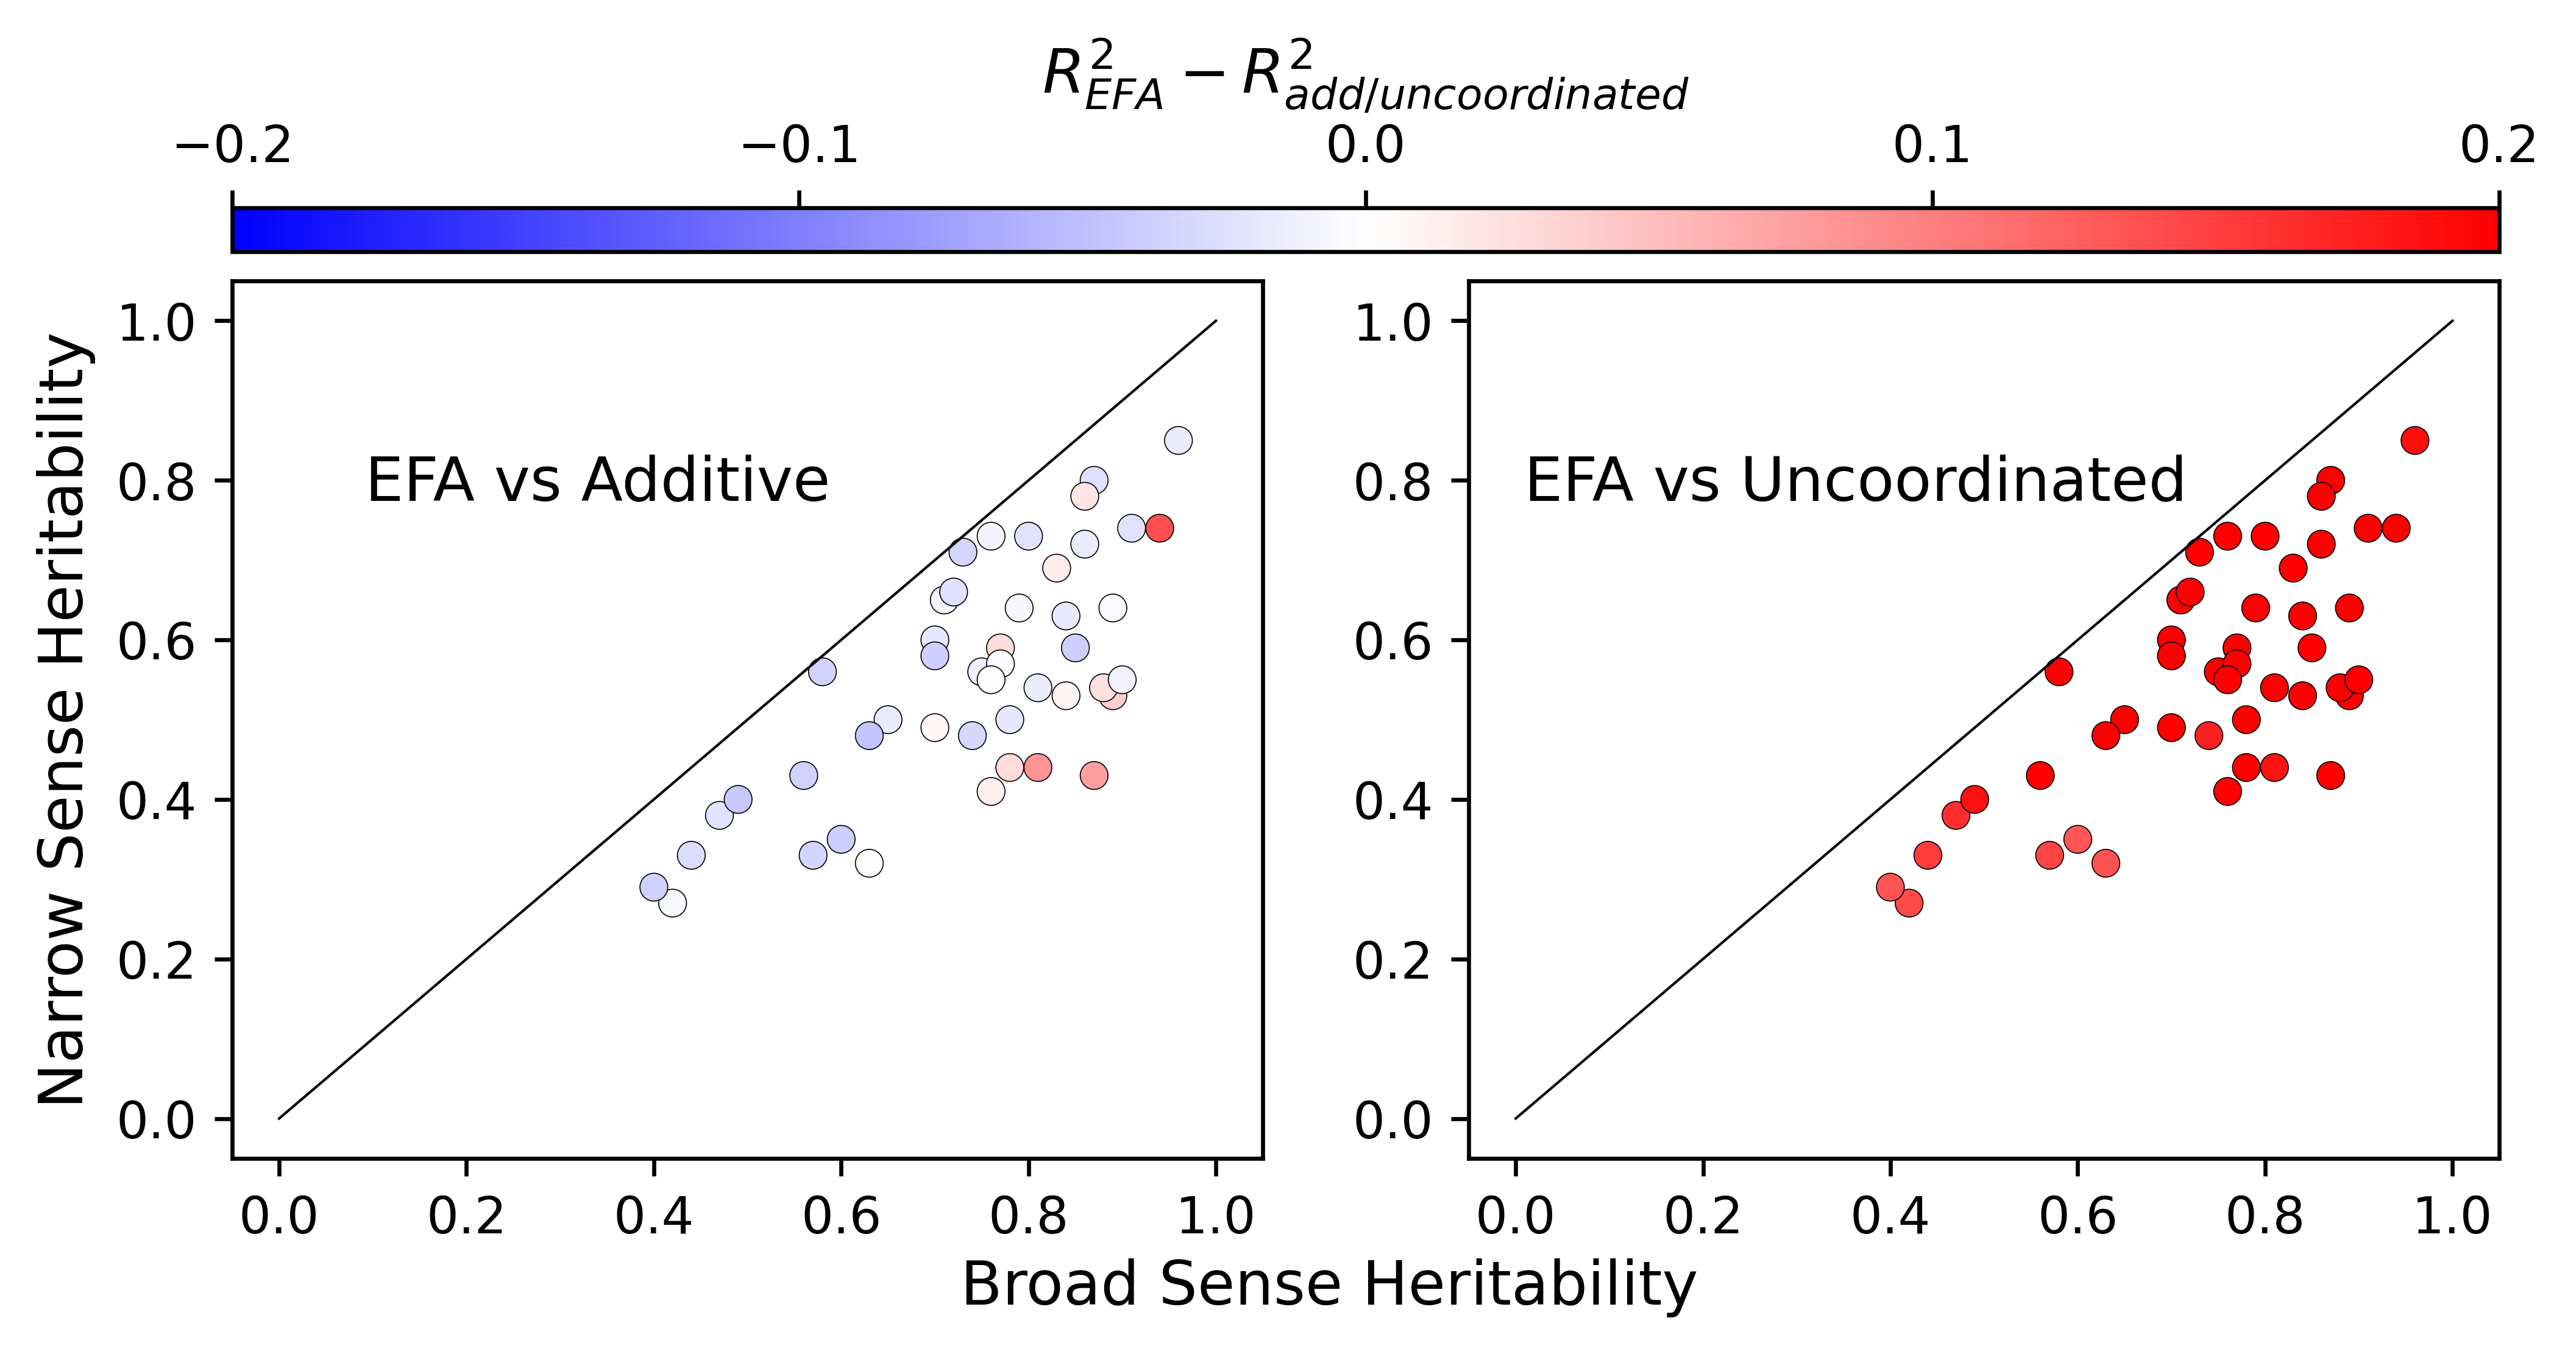

In [182]:
# from tkinter import font


# df = pd.read_csv('./NIHMS429465-supplement-3.csv')
# res = pd.read_csv('./bloom13/prediction.csv')
# res_mean = res.groupby('pheno').mean()

# idx = [4  ,6  ,8  ,9  ,10 ,11 ,5  ,16 ,17 ,18 ,20 ,21 ,24 ,25 ,27 ,30 ,37 ,38 ,41 ,45 ]
# # res_mean = res_mean.iloc[idx,:]
# # df = df.iloc[idx,:]


# H2 = df['broad-sense (H^2)']
# h2 = df['narrow-sense (h^2) (using average of replicates)']



# # stat_test = res.groupby('pheno').apply(lambda df: stats.ttest_1samp(df['diff'], 0, alternative='greater')[1])
# # diff = stat_test
# # diff = np.array(res_mean['ide']) - np.array(res_mean['adf'])

# cmap = plt.get_cmap("bwr")
# cmap_lim = 0.2
# norm = TwoSlopeNorm(vmin=-cmap_lim, vmax=cmap_lim, vcenter=0)
# # norm = TwoSlopeNorm(vmin=0, vmax=1, vcenter=0.5)

# fig, ax = plt.subplots(1, 2, figsize=(8, 4))
# fig.dpi = 600
# # fig.suptitle('Trait Heritability')
# ax[0].scatter(y=h2, x=H2, marker='o', s = 30, c=np.array(res_mean['ide']) - np.array(res_mean['adf']), 
#     edgecolors='black', linewidth=.2, cmap = 'bwr', vmin=-cmap_lim, vmax = cmap_lim)
# ax[1].scatter(y=h2, x=H2, marker='o', s = 30, c=np.array(res_mean['ide']) - np.array(res_mean['epf']), 
#     edgecolors='black', linewidth=.2, cmap = 'bwr', vmin=-cmap_lim, vmax = cmap_lim)
# ax[0].plot([0, 1], [0, 1], color = 'black', linewidth = 0.5)
# ax[1].plot([0, 1], [0, 1], color = 'black', linewidth = 0.5)

# sm =  ScalarMappable(norm=norm, cmap=cmap)
# sm.set_array([])


# cbaxes = fig.add_axes([0.125, 0.82, 0.775, 0.03]) 
# cbaxes.set_title(r'$R^{2}_{EFA} - R^{2}_{add/uncoordinated}$')
# cbaxes.tick_params(labelsize=10)
# cbar = fig.colorbar(sm, cax=cbaxes, orientation='horizontal', 
#     ticklocation='top', ticks=np.arange(-0.2, 0.2+1, 0.1))
# # cbar.set_label(r'$R^{2}_{efa} - R^{2}_{add}$', rotation=270)


# ax[0].set_ylabel('Narrow Sense Heritability', fontsize = 12)
# fig.text(0.5, 0.1, 'Broad Sense Heritability', ha='center', fontdict = {'fontsize' : 12})
# fig.text(0.25, 0.65, 'EFA vs Additive', ha='center', fontdict = {'fontsize' : 12})
# fig.text(0.68, 0.65, 'EFA vs Uncoordinated', ha='center', fontdict = {'fontsize' : 12})
# plt.subplots_adjust(top = 0.8, bottom = 0.2)
# plt.savefig('../yeast/plots/fig4-alt.png')
# plt.show()

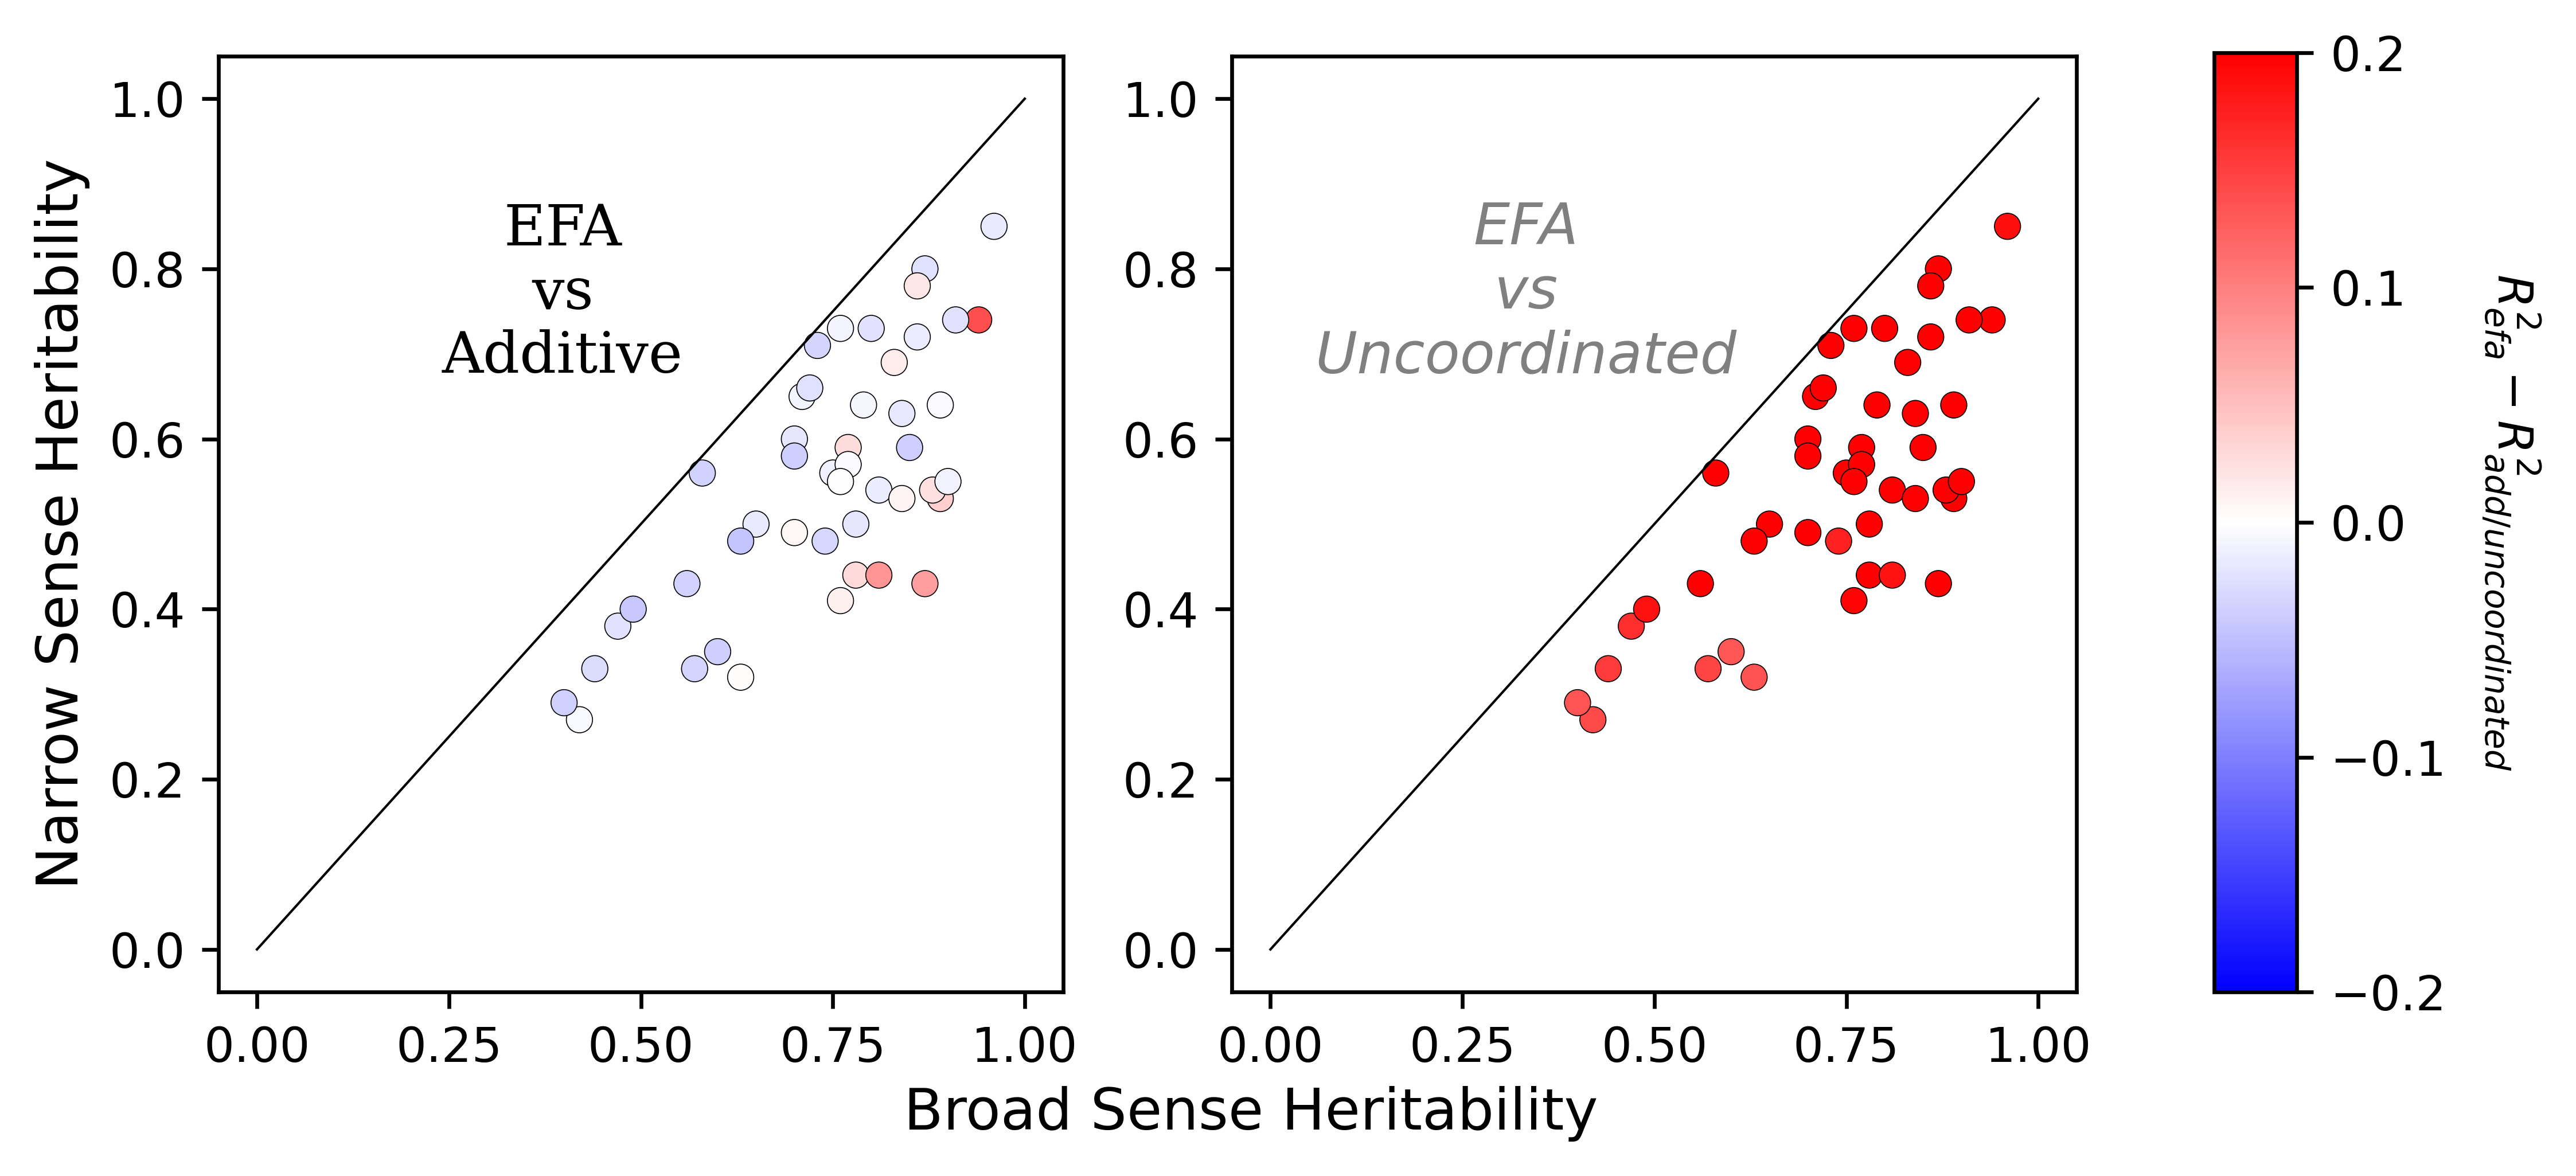

In [234]:
from tkinter import font


df = pd.read_csv('./NIHMS429465-supplement-3.csv')
res = pd.read_csv('./bloom13/prediction.csv')
res_mean = res.groupby('pheno').mean()

idx = [4  ,6  ,8  ,9  ,10 ,11 ,5  ,16 ,17 ,18 ,20 ,21 ,24 ,25 ,27 ,30 ,37 ,38 ,41 ,45 ]
# res_mean = res_mean.iloc[idx,:]
# df = df.iloc[idx,:]


H2 = df['broad-sense (H^2)']
h2 = df['narrow-sense (h^2) (using average of replicates)']



# stat_test = res.groupby('pheno').apply(lambda df: stats.ttest_1samp(df['diff'], 0, alternative='greater')[1])
# diff = stat_test
# diff = np.array(res_mean['ide']) - np.array(res_mean['adf'])

cmap = plt.get_cmap("bwr")
cmap_lim = 0.2
norm = TwoSlopeNorm(vmin=-cmap_lim, vmax=cmap_lim, vcenter=0)
# norm = TwoSlopeNorm(vmin=0, vmax=1, vcenter=0.5)

fig, ax = plt.subplots(1, 2, figsize=(8, 4))
fig.dpi = 600
# fig.suptitle('Trait Heritability')
ax[0].scatter(y=h2, x=H2, marker='o', s = 30, c=np.array(res_mean['ide']) - np.array(res_mean['adf']), 
    edgecolors='black', linewidth=.2, cmap = 'bwr', vmin=-cmap_lim, vmax = cmap_lim)
ax[1].scatter(y=h2, x=H2, marker='o', s = 30, c=np.array(res_mean['ide']) - np.array(res_mean['epf']), 
    edgecolors='black', linewidth=.2, cmap = 'bwr', vmin=-cmap_lim, vmax = cmap_lim)
ax[0].plot([0, 1], [0, 1], color = 'black', linewidth = 0.5)
ax[1].plot([0, 1], [0, 1], color = 'black', linewidth = 0.5)

sm =  ScalarMappable(norm=norm, cmap=cmap)
sm.set_array([])


cbaxes = fig.add_axes([0.85, 0.2, 0.03, 0.6825]) 
# cbaxes.set_title(r'$R^{2}_{EFA} - R^{2}_{add/uncoordinated}$')
cbaxes.tick_params(labelsize=10)
cbar = fig.colorbar(sm, cax=cbaxes, orientation='vertical', 
    ticklocation='right', ticks=np.arange(-0.2, 0.2+1, 0.1))
cbar.set_label(r'$R^{2}_{efa} - R^{2}_{add/uncoordinated}$', rotation=270,labelpad=20)


ax[0].set_ylabel('Narrow Sense Heritability', fontsize = 12)
fig.text(0.5, 0.1, 'Broad Sense Heritability', ha='center', fontdict = {'fontsize' : 12, })
fig.text(0.25, 0.65, 'EFA\nvs\nAdditive', ha='center', 
    fontdict = {'fontsize' : 12, 'style':'normal', 'weight':'normal', 'family':'serif'})
fig.text(0.6, 0.65, 'EFA\nvs\nUncoordinated', ha='center', 
    fontdict = {'fontsize' : 12, 'style':'italic', 'weight':'light', 'family':'sans', 'color':'grey'})
plt.subplots_adjust(right=0.8, bottom=0.2)
plt.savefig('../yeast/plots/fig4-alt.png')
plt.show()

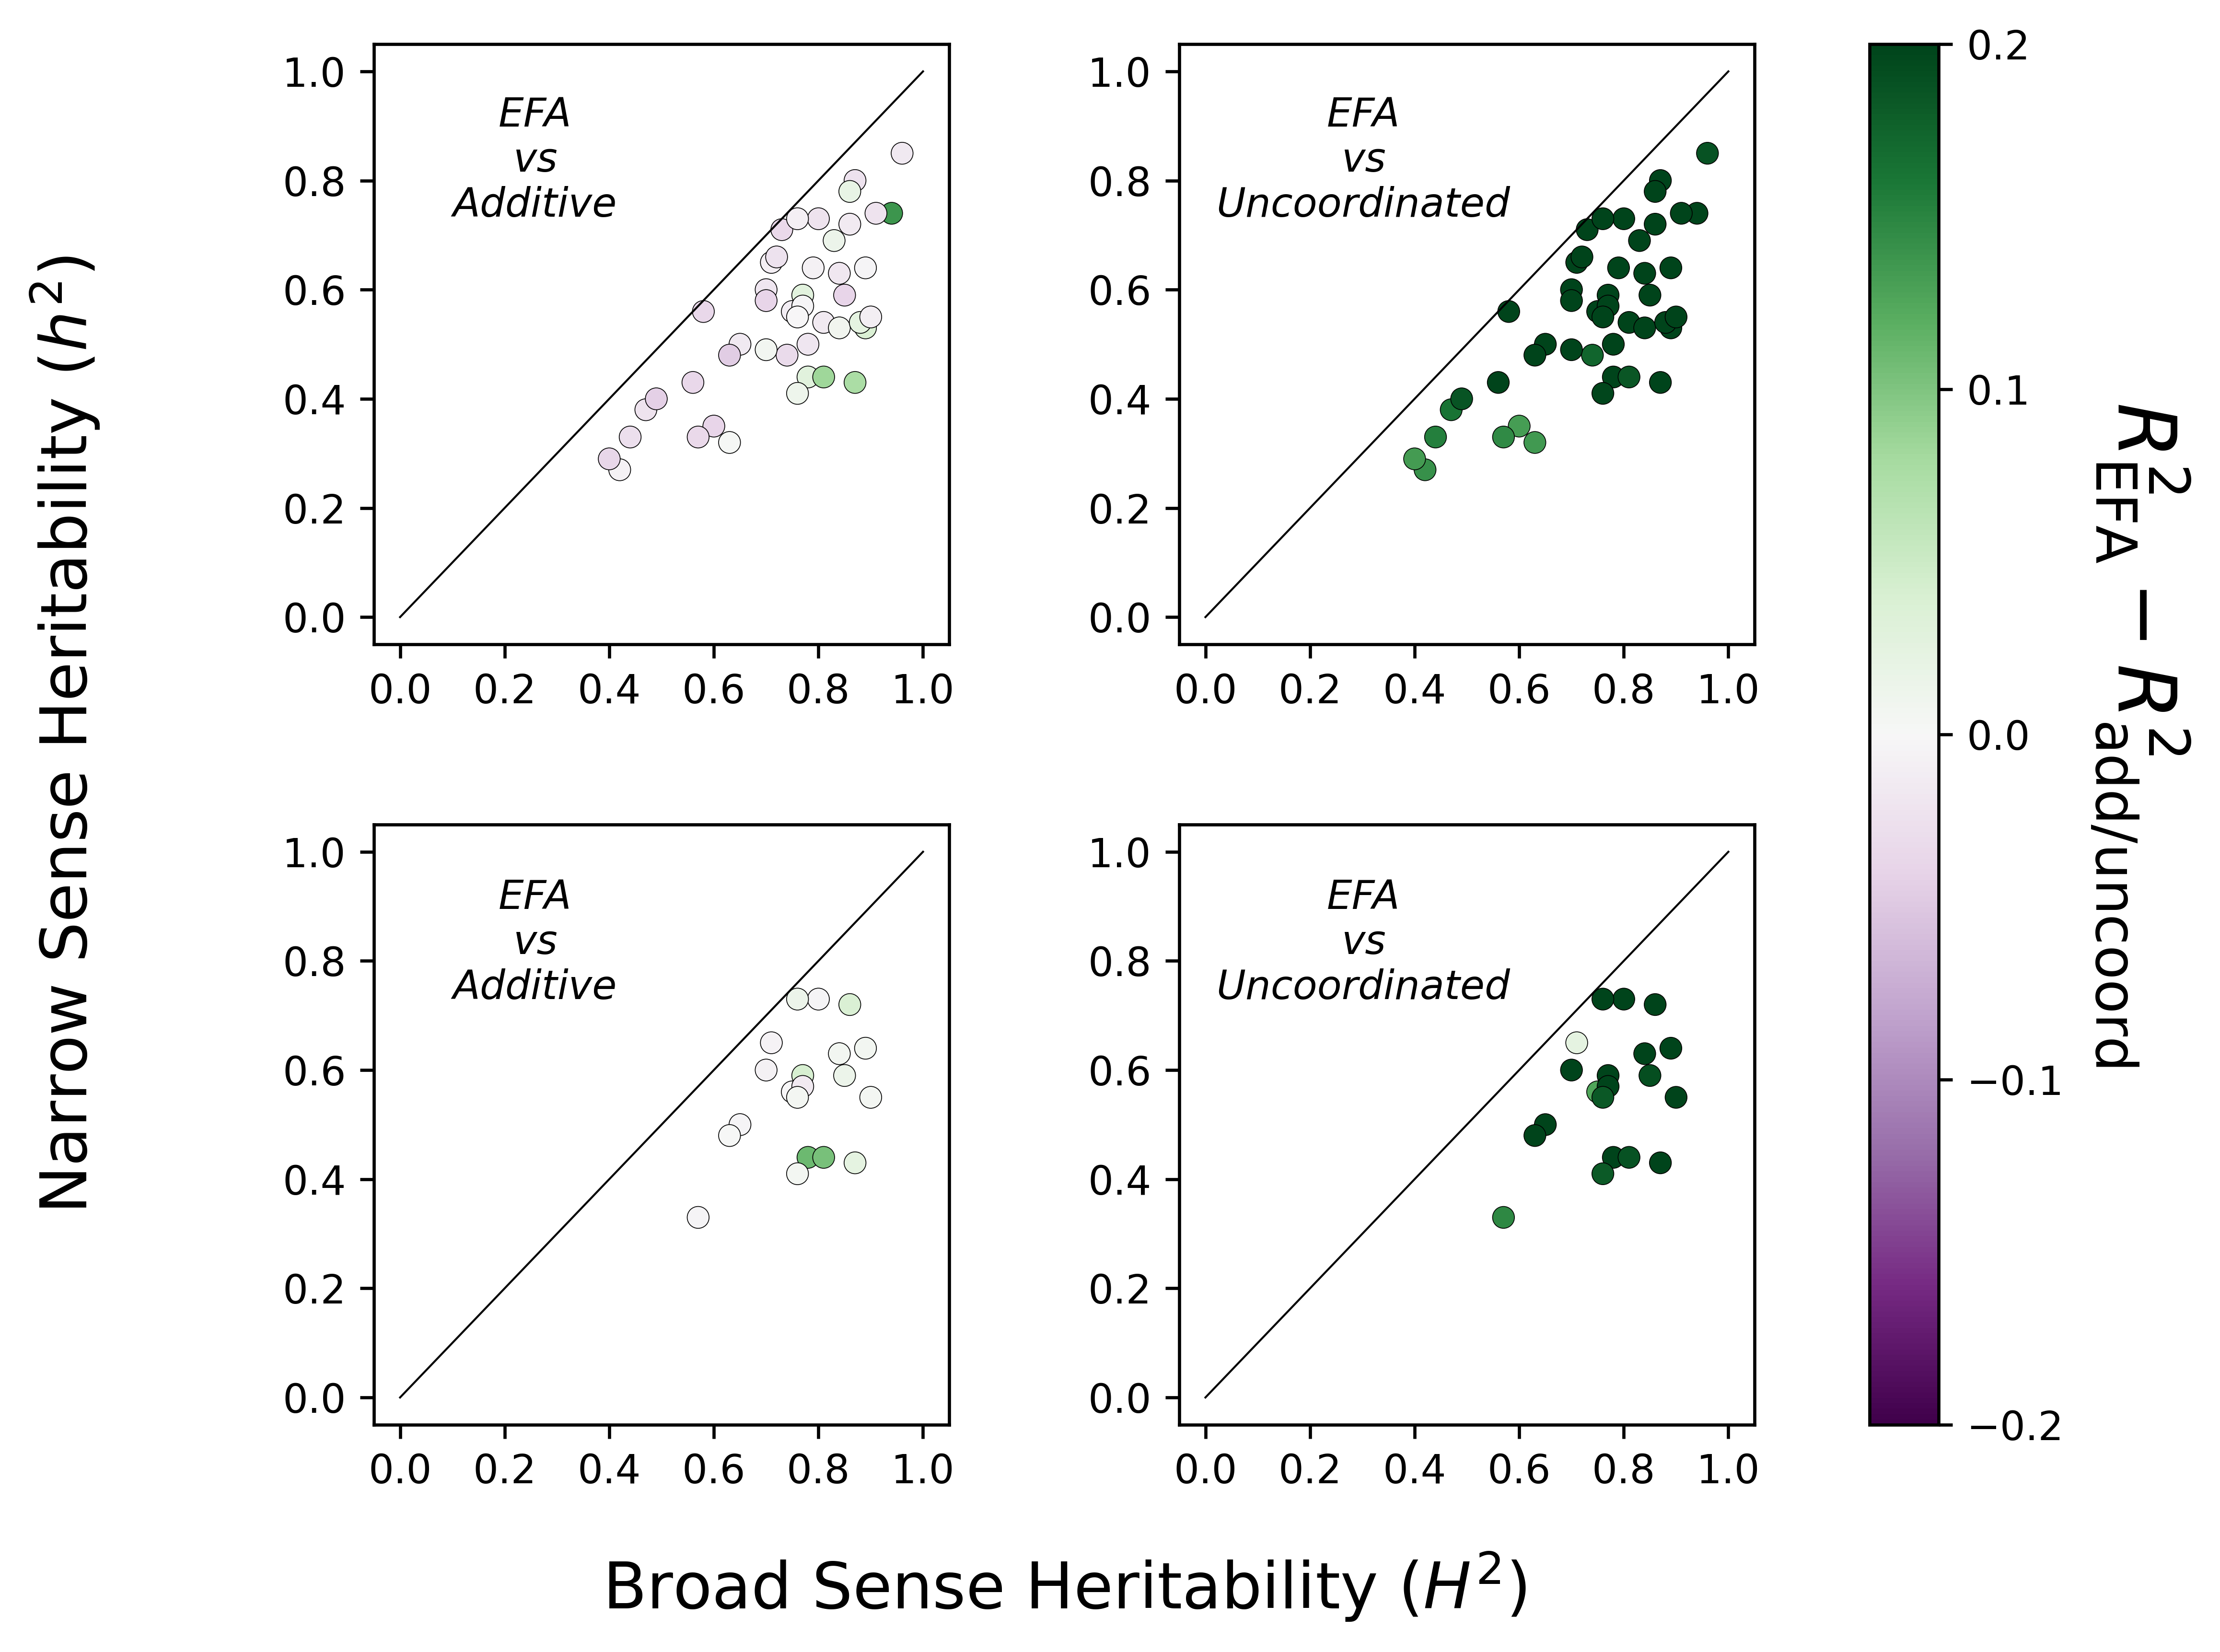

In [4]:
from audioop import lin2adpcm
from tkinter import font


df = pd.read_csv('./NIHMS429465-supplement-3.csv')
res = pd.read_csv('./bloom13/prediction.csv')
res_13_mean = res.groupby('pheno').mean()

res = pd.read_csv('./bloom15/prediction.csv')
res_15_mean = res.groupby('pheno').mean()

idx = [4  ,6  ,8  ,9  ,10 ,11 ,5  ,16 ,17 ,18 ,20 ,21 ,24 ,25 ,27 ,30 ,37 ,38 ,41 ,45 ]
df_13 = df
df_15 = df.iloc[idx,:].reset_index()


H2_13 = df_13['broad-sense (H^2)']
h2_13 = df_13['narrow-sense (h^2) (using average of replicates)']

H2_15 = df_15['broad-sense (H^2)']
h2_15 = df_15['narrow-sense (h^2) (using average of replicates)']



# stat_test = res.groupby('pheno').apply(lambda df: stats.ttest_1samp(df['diff'], 0, alternative='greater')[1])
# diff = stat_test
# diff = np.array(res_mean['ide']) - np.array(res_mean['adf'])

cmap_name = 'PRGn'

cmap = plt.get_cmap(cmap_name)
cmap_lim = 0.2
norm = TwoSlopeNorm(vmin=-cmap_lim, vmax=cmap_lim, vcenter=0)
# norm = TwoSlopeNorm(vmin=0, vmax=1, vcenter=0.5)

fig, ax = plt.subplots(2, 2, figsize=(8, 8))
fig.dpi = 600
# fig.suptitle('Trait Heritability')
ax[0, 0].scatter(y=h2_13, x=H2_13, marker='o', s = 30, c=np.array(res_13_mean['ide']) - np.array(res_13_mean['adf']), 
    edgecolors='black', linewidth=.2, cmap = cmap_name, vmin=-cmap_lim, vmax = cmap_lim)
ax[0, 1].scatter(y=h2_13, x=H2_13, marker='o', s = 30, c=np.array(res_13_mean['ide']) - np.array(res_13_mean['epf']), 
    edgecolors='black', linewidth=.2, cmap = cmap_name, vmin=-cmap_lim, vmax = cmap_lim)
# ax[1, 0].scatter(y=h2_13, x=H2_13, marker='x', s = 10, color='black', linewidth=1)
# ax[1, 1].scatter(y=h2_13, x=H2_13, marker='x', s = 10, color='black', linewidth = 1)
ax[1, 0].scatter(y=h2_15, x=H2_15, marker='o', s = 30, c=np.array(res_15_mean['ide']) - np.array(res_15_mean['adf']), 
    edgecolors='black', linewidth=.2, cmap = cmap_name, vmin=-cmap_lim, vmax = cmap_lim)
ax[1, 1].scatter(y=h2_15, x=H2_15, marker='o', s = 30, c=np.array(res_15_mean['ide']) - np.array(res_15_mean['epf']), 
    edgecolors='black', linewidth=.2, cmap = cmap_name, vmin=-cmap_lim, vmax = cmap_lim)
ax[0, 0].plot([0, 1], [0, 1], color = 'black', linewidth = 0.5)
ax[0, 1].plot([0, 1], [0, 1], color = 'black', linewidth = 0.5)
ax[1, 0].plot([0, 1], [0, 1], color = 'black', linewidth = 0.5)
ax[1, 1].plot([0, 1], [0, 1], color = 'black', linewidth = 0.5)

for axis in ax.flatten():
    axis.set_xticks(ticks=np.arange(0, 1+0.1, 0.2))
    axis.set_yticks(ticks=np.arange(0, 1+0.1, 0.2))

sm =  ScalarMappable(norm=norm, cmap=cmap)
sm.set_array([])


cbaxes = fig.add_axes([0.85, 0.2, 0.03, 0.6]) 
# cbaxes.set_title(r'$R^{2}_{EFA} - R^{2}_{add/uncoordinated}$')
cbaxes.tick_params(labelsize=10)
cbar = fig.colorbar(sm, cax=cbaxes, orientation='vertical', 
    ticklocation='right', ticks=np.arange(-0.2, 0.2+1, 0.1))
cbar.set_label(r'$R^{2}_{\mathrm{EFA}} - R^{2}_{\mathrm{add/uncoord}}$', rotation=270,labelpad=32, size = 20)


fontdict = {'fontsize' : 10, 'style':'italic', 'weight':'light', 'family':'sans', 'color':'black'}

fig.text(0.05, 0.5, r'Narrow Sense Heritability ($h^{2}$)', va='center', rotation='vertical', fontdict = {'fontsize': 16})
fig.text(0.5, 0.12, r'Broad Sense Heritability ($H^{2}$)', ha='center', fontdict = {'fontsize': 16})
fig.text(0.27, 0.725, 'EFA\nvs\nAdditive', ha='center', fontdict = fontdict)
fig.text(0.63, 0.725, 'EFA\nvs\nUncoordinated', ha='center', fontdict = fontdict)
fig.text(0.27, 0.385, 'EFA\nvs\nAdditive', ha='center', fontdict = fontdict)
fig.text(0.63, 0.385, 'EFA\nvs\nUncoordinated', ha='center', fontdict = fontdict)
plt.subplots_adjust(left = 0.2, right=0.8, bottom=0.2, top = 0.8,hspace = 0.3, wspace = 0.4)
plt.savefig('../yeast/plots/fig4.png', dpi=600)
plt.show()